# Investigating the Impact of Angel Group Support and Tax Hikes on Outcomes

## Introduction

This project explores two main research questions in entrepreneurial finance and public health using causal inference techniques:
1. The impact of early-stage financiers (angel investors) on the success of startups.
2. The effect of cigarette tax hikes on smoking rates among pregnant women.

## Part 1: Angel Investor Impact on SaaS Ventures

### Background

A central question in entrepreneurial finance is to what extent early-stage financiers impact the firms they support. This question is addressed using data from one of the biggest SaaS (software as a service) investor angel groups. The voting procedure that determines which entrepreneur gets the support of the angel group provides an opportunity to utilize a sharp regression discontinuity design.

### Data

The dataset `lecture4_RD.csv` contains data on:
- **dau_mau**: Daily active user/monthly active user ratio measured 15 months after voting.
- **revenue_g**: Revenue growth rate measured 15 months after voting.
- **votes**: Number of angel investor votes.

## Methodology

We employ a sharp regression discontinuity design to analyze the impact of angel group support on two success measures: daily active user to monthly active user ratio (*dau_mau*) and revenue growth rate (*revenue_g*).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

# Load the dataset
data_rd = pd.read_csv('assets/lecture4_RD.csv')

# Display the first few rows of the dataset
data_rd.head()

,vote,dau_mau,revenue_g
0,32,0.824858,1.371313
1,0,0.030839,0.488632
2,15,0.199545,0.718289
3,28,0.652112,1.371974
4,24,0.602617,1.107473


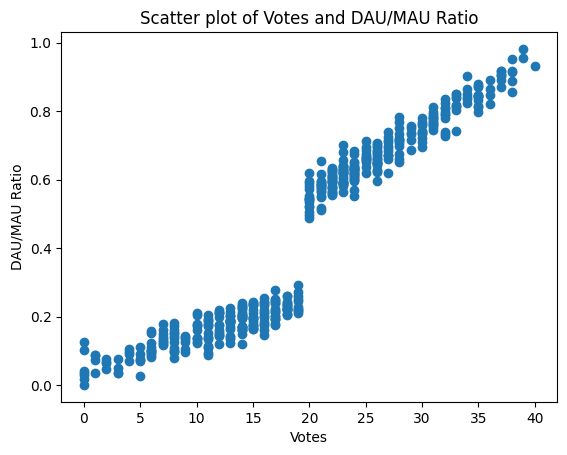

In [3]:
# Plot the data for dau_mau against votes
plt.scatter(data_rd['vote'], data_rd['dau_mau'])
plt.xlabel('Votes')
plt.ylabel('DAU/MAU Ratio')
plt.title('Scatter plot of Votes and DAU/MAU Ratio')
plt.show()

In [5]:
# Create binary variable D and re-centered running variable vote_c
data_rd['D'] = np.where(data_rd['vote'] >= 20, 1, 0)
data_rd['vote_c'] = data_rd['vote'] - 20
data_rd.head()

,vote,dau_mau,revenue_g,D,vote_c
0,32,0.824858,1.371313,1,12
1,0,0.030839,0.488632,0,-20
2,15,0.199545,0.718289,0,-5
3,28,0.652112,1.371974,1,8
4,24,0.602617,1.107473,1,4


In [8]:
# Regress dau_mau on vote_c, D, and their interaction using robust standard errors
reg = smf.ols(formula='dau_mau ~ vote_c + D + vote_c:D', data=data_rd).fit()
robust_reg = reg.get_robustcov_results(cov_type='HC1')
d_coeff1_2_2 = round(robust_reg.params[2], 4)
d_coeff1_2_2

0.3016

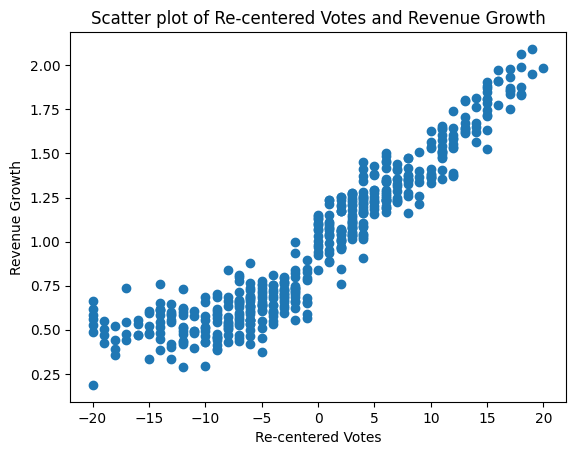

In [9]:
# Plot the data for revenue_g against the re-centered running variable vote_c
plt.scatter(data_rd['vote_c'], data_rd['revenue_g'])
plt.xlabel('Re-centered Votes')
plt.ylabel('Revenue Growth')
plt.title('Scatter plot of Re-centered Votes and Revenue Growth')
plt.show()

In [10]:
# Create a new column for vote_c squared
data_rd['vote_c_sq'] = data_rd['vote_c'] ** 2
data_rd.head()

,vote,dau_mau,revenue_g,D,vote_c,vote_c_sq
0,32,0.824858,1.371313,1,12,144
1,0,0.030839,0.488632,0,-20,400
2,15,0.199545,0.718289,0,-5,25
3,28,0.652112,1.371974,1,8,64
4,24,0.602617,1.107473,1,4,16


In [14]:
# Regress revenue_g on vote_c, vote_c_sq, and D using robust standard errors
reg = smf.ols(formula='revenue_g ~ vote_c + vote_c_sq + D', data=data_rd).fit()
robust_reg = reg.get_robustcov_results(cov_type='HC1')
d_coeff1_4_2 = round(robust_reg.params[3], 4)
d_coeff1_4_2

0.2474

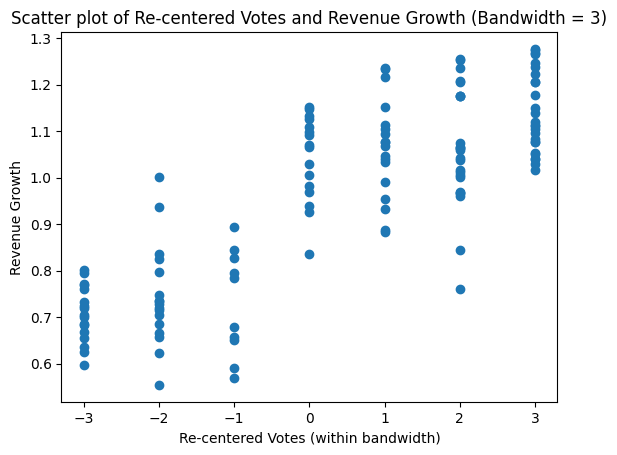

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              revenue_g   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     213.7
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.23e-41
Time:                        19:10:39   Log-Likelihood:                 113.98
No. Observations:                 129   AIC:                            -222.0
Df Residuals:                     126   BIC:                            -213.4
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7870      0.025     31.852      0.000       0.738       0.836
vote_c         0.0277      0.008      3.404      0.001       0.012       0.044
D              0.2488      0.039      6.418      0.000       0.172       0.325
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.851
Skew:                          -0.173   Prob(JB):                        0.654
Kurtosis:                       3.197   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [22]:
# Restrict estimation to observations close to the threshold (bandwidth = 3 votes)
data_band = data_rd[(data_rd['vote'] >= 17) & (data_rd['vote'] <= 23)]

# Plot the data for revenue_g against the re-centered running variable vote_c within the bandwidth
plt.scatter(data_band['vote_c'], data_band['revenue_g'])
plt.xlabel('Re-centered Votes (within bandwidth)')
plt.ylabel('Revenue Growth')
plt.title('Scatter plot of Re-centered Votes and Revenue Growth (Bandwidth = 3)')
plt.show()

# Regress revenue_g on vote_c and D with restricted bandwidth using robust standard errors
reg = smf.ols(formula='revenue_g ~ vote_c + D', data=data_band).fit()
robust_reg = reg.get_robustcov_results(cov_type='HC1')


robust_reg.summary()

In [24]:
d_coeff1_5_1 = round(robust_reg.params[2], 4)
d_coeff1_5_1

0.2488

## Results

### Impact on DAU/MAU Ratio
The coefficient in front of the binary variable D (representing angel group support) is 0.3016, indicating a positive impact of angel support on the DAU/MAU ratio.

### Impact on Revenue Growth
The coefficient in front of the binary variable D is 0.2474 in the nonlinear model, and 0.2488 when using a reduced bandwidth. The reduced bandwidth model shows a slightly higher estimate but with lower precision.

### Angel Investor Impact

The results indicate a significant positive impact of angel group support on both the DAU/MAU ratio and revenue growth of SaaS ventures. The regression discontinuity design provides credible estimates of these effects.

### References

- [Kerr and Lerner, Review of Financial Studies 2014](assets/KerrLerner2014.pdf)